# Simplified detection of urban types using momepy
O. Kaufmann, 2024.

Example adapted from the [SDSC 2021 Workshop](https://github.com/martinfleis/sdsc21-workshop) led by Martin Fleischmann as provided in the momey documentation. 
This example illustrates the potential of morphometrics captured by `momepy` in capturing the structure of cities. For more information, you may refer to 

> Fleischmann M, Feliciotti A, Romice O and Porta S (2021) Methodological Foundation of a Numerical Taxonomy of Urban Form. Environment and Planning B: Urban Analytics and City Science, doi: 10.1177/23998083211059835


In [1]:

# @info: Execute me to activate interactive questions
# ---------------------------------------------------

# O. KAUFMANN, 2024. 

from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import ipywidgets as widgets
from IPython.display import HTML, clear_output
import codecs

def decode_text(text):
    return codecs.decode(text, 'hex').decode('utf')

def encode_text(text):
    return codecs.encode(codecs.encode(text,'utf8'), 'hex').decode('utf')
    
@magic_arguments.magic_arguments()
@magic_arguments.argument('--prompt', default='none', help='Encoded prompt')
@magic_arguments.argument('--answer', default='none', help='Encoded answer')
@magic_arguments.argument('--title', default='Question', help='First line of alert block')
@magic_arguments.argument('--button-label', default='Solution', help='Text to display on button')
@magic_arguments.argument('--div-type', default='alert-warning', help='Type of alert block')
    
@register_cell_magic
def display_prompt(line, cell):
    args = magic_arguments.parse_argstring(display_prompt, line)
    title = args.title
    prompt = args.prompt
    answer = args.answer
    button_label = args.button_label
    div_type = args.div_type
    def make_block(text, title=title, label=button_label, div_type=div_type):
        if title != 'none':
            return HTML(f"""<div class="alert alert-block {div_type}"> <b>{title}</b><br> {text} </div>""")
        else:
            return HTML(f"""<div class="alert alert-block {div_type}"> {text} </div>""")
    if prompt != 'none':
        display(make_block(decode_text(prompt)))
    toggle_button = widgets.ToggleButton(description=button_label)
    output = widgets.Output()
    def on_button_clicked(b):
        with output:
            if b['new']:  
                display(HTML(decode_text(answer)))
            else:
                output.clear_output()
    toggle_button.observe(on_button_clicked, 'value')
    display(toggle_button)
    display(output)

HTML("""<div class="alert alert-block alert-success"> <b>Success:</b><br>Interactive questions activated.</div>""")


Important information: Execute me to activate interactive questions.

***
## 1. Import packages	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import libpysal
import momepy as mm
import osmnx as ox
import networkx as nx
from clustergram import Clustergram

***
## 2. Import data from openstreetmap 	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

<div class="alert alert-block alert-success">
	<b>2.1 Use geocoding </b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.1: </b><br>Check if osmnx can find in Cuesmes near Mons. What are the returned numbers?
</div>

<div class="alert alert-block alert-success">
	<b>2.2 Use osmnx to have a dataset of buildings</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.1: </b><br>Using the features_from_address function of osmnx package, download the buildings in a 3km by 3km square centered on  Cuesmes from OpenStreetMap.  
    What type of object is returned by this function?
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.2: </b><br>What are the types of geometries in the dataset?
    Filter out buildings to keep Polygons only.
</div>

In [5]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e7072696e74286275696c64696e67732e67656f6d5f747970652e76616c75655f636f756e74732829293c62723e0a6275696c64696e6773203d206275696c64696e67735b6275696c64696e67732e67656f6d5f747970653d3d27506f6c79676f6e275d3c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions


<div class="alert alert-block alert-warning">
<b>Question 2.2.3: </b><br>What is the current CRS of the building dataset?  
    Reproject the buildings dataset in the Lambert Belge 2008 projection.
</div>

In [6]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e7072696e742866276f726967696e616c206372733a207b6275696c64696e67732e6372737d27293c62723e0a6275696c64696e6773203d206275696c64696e67735b5b2767656f6d65747279275d5d2e746f5f637273286c6f63616c5f637273293c62723e0a7072696e7428662766696e616c206372733a207b6275696c64696e67732e6372737d27293c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions


<div class="alert alert-block alert-warning">
<b>Question 2.2.4: </b><br>Plot the buildings
</div>

<Axes: >

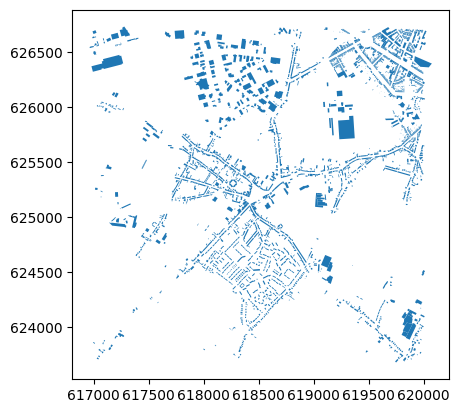

In [ ]:
# Expected outcome below...

<div class="alert alert-block alert-success">
	<b>2.3 Use osmnx to get the walkable network</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.1: </b><br>Using the same approach as for buildings, download the streets in Cuesmes from OpenStreetMap. This time, as we want to retrieve a network, use the `graph_from_address` funtion of the osmnx package. Make sure to use the "walk" network_type to extract the street network. Store the object in `osm_graph`. 
    What type of object is returned by this function?
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.2: </b><br>Check the CRS of `osm_graph` and reproject the graph into the Lambert Belge 2008 rojection if needed.
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.3: </b><br>Make a graphical representation of osm_graph.  
    Make sure to double check the type of this object to find the way to do this...
</div>

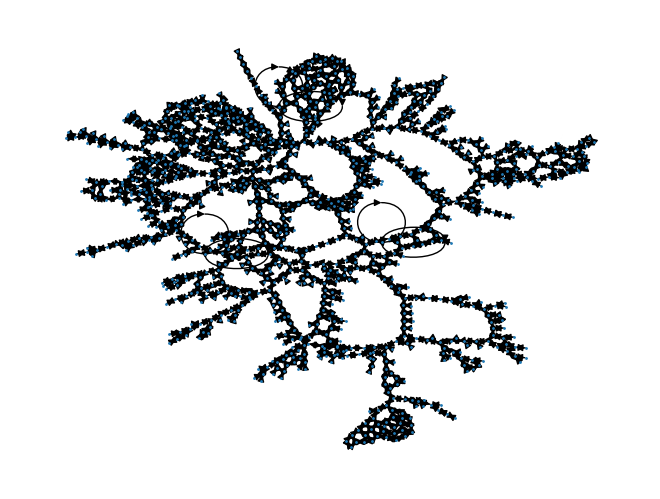

In [ ]:
# Expected outcome below...

<b>Note:</b><br>    For the processing in momepy, we will convert the graph to a GeoDataFrame named `streets`.  <br>
    Read the way it is done hereunder and make sure you understand what is done.


In [11]:
streets = ox.graph_to_gdfs(
    ox.convert.to_undirected(osm_graph),
    nodes=False,
    edges=True,
    node_geometry=False,
    fill_edge_geometry=True,
).reset_index(drop=True)
streets.tail()

osmid  highway lanes maxspeed name  oneway  ref reversed  \
1444  1051839920  service   NaN      NaN  NaN   False  NaN     True   
1445  1051839905  service   NaN      NaN  NaN   False  NaN     True   
1446  1051839906  service   NaN      NaN  NaN   False  NaN     True   
1447  1051839906  service   NaN      NaN  NaN   False  NaN     True   
1448  1081001186  footway   NaN      NaN  NaN   False  NaN     True   

         length                                           geometry  \
1444  67.130497  LINESTRING (619233.657 626017.396, 619232.264 ...   
1445  47.046478  LINESTRING (619067.646 626292.044, 619062.257 ...   
1446  57.563937  LINESTRING (619064.371 626187.86, 619061.861 6...   
1447  14.891009  LINESTRING (619065.464 626173.004, 619064.371 ...   
1448   5.091372  LINESTRING (618522.187 624434.213, 618527.222 ...   

            from          to junction        service access bridge tunnel  \
1444  9666000672  9665980499      NaN            NaN    NaN    NaN    NaN   
1445  9666000629  9666000628      NaN  parking_aisle    NaN    NaN    NaN   
1446  9666000633  9666000628      NaN  parking_aisle    NaN    NaN    NaN   
1447  9666000632  9666000633      NaN  parking_aisle    NaN    NaN    NaN   
1448  9908190941  9908190939      NaN            NaN    NaN    NaN    NaN   

     width  
1444   NaN  
1445   NaN  
1446   NaN  
1447   NaN  
1448   NaN

In [ ]:

%%display_prompt --title Question 2.3.4: --prompt 486176652061206c6f6f6b206174207468652066726f6d20616e6420746f206669656c642e205768617420646f20796f75207468696e6b2069732073746f72656420696e20746865736520636f6c756d6e733f0a --answer 202020204e6f64657320696e64657820696e20746865204f534d206e6574776f726b2067726170682e
# @info: Execute me to display the question

Question 2.3.4: Have a look at the from and to field. What do you think is stored in these columns?

<div class="alert alert-block alert-warning">
<b>Question 2.3.5: </b><br>Before using this dataset, we should clean it a little bit.  
    First use `momepy remove_false_nodes` function on `streets`. What does this function?   
    Then only keep the geometry in the dataframe, we will not use the other attributes.
</div>

In [ ]:
# Expected outcome below...

geometry
0  LINESTRING (617321.981 624099.242, 617317.116 ...
1  LINESTRING (617290.071 624091.116, 617295.486 ...
2  LINESTRING (617276.165 624022.17, 617284.61 62...
3  LINESTRING (617290.071 624091.116, 617299.836 ...
4  LINESTRING (617586.399 624283.38, 617579.678 6...

<div class="alert alert-block alert-success">
	<b>2.4 Display the cleaned buidings and walkable network</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.4.1: </b><br>Make a map showing buildings and streets
</div>

<Axes: >

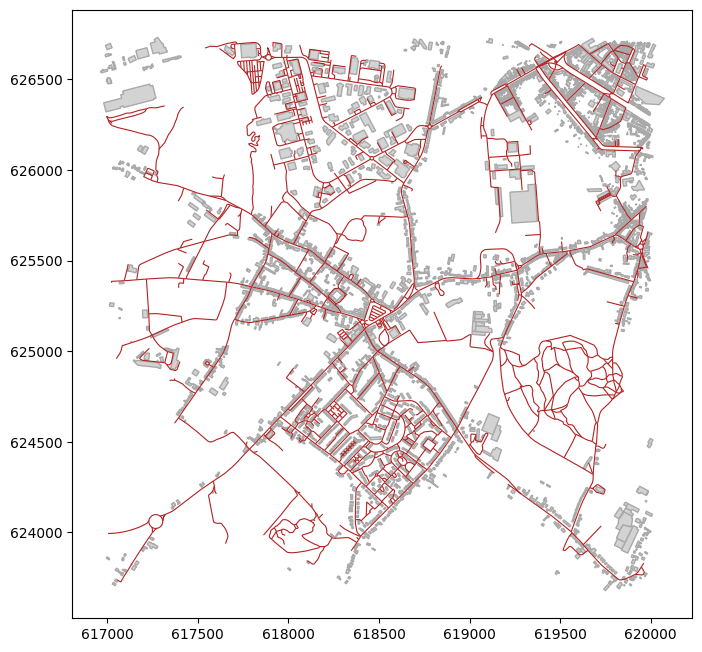

In [13]:
#
fig, ax = plt.subplots(figsize=(8,12))
buildings.plot(ax=ax, facecolor='lightgrey', edgecolor='darkgrey')
streets.plot(ax=ax, edgecolor='firebrick', linewidth=.8)

***
## 3. Prepare data for measuring morphological characters	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

<div class="alert alert-block alert-success">
	<b>3.1 Create the tessellation</b>
</div>

In [14]:
limit = mm.buffered_limit(buildings, "adaptive")

/home/su530201/.local/share/virtualenvs/GIS_Urban_Planning-bS-tQSLp/lib/python3.10/site-packages/libpysal/graph/base.py:1375: UserWarning: The numba package is used extensively in this module to accelerate the computation of graphs. Without numba, these computations may become unduly slow on large data.
  head, tail, weights = _gabriel(


<div class="alert alert-block alert-warning">
<b>Question 3.1.1: </b><br>What is the type of `limit` ?
</div>

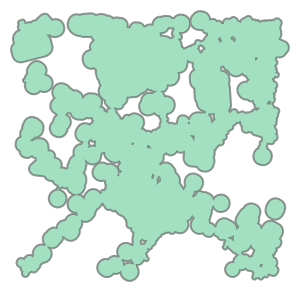

In [15]:
limit

In [16]:
buildings['id'] = buildings.index.get_level_values(1)
buildings2 = buildings.set_index('id')

In [17]:
tessellation = mm.morphological_tessellation(buildings2, clip=limit)

OpenStreetMap data are often problematic due to low quality of some polygons. If some collapse, we get a mismatch between the length of buildings and the length of polygons.

In [18]:
collapsed, _ = mm.verify_tessellation(tessellation, buildings2.explode())

/tmp/ipykernel_764247/2043392700.py:1: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should  be edited. Index of affected elements: [107395503, 159167205, 217882401, 220766979, 220941864, 222189889, 222340426, 222644958, 222678431, 222773481, 223187256, 224284349, 224396201, 224412213, 225599770, 225599775, 298377415, 1212183735, 1291161670, 1291161748, 1291161759, 1291161802, 1291161806, 1291747088, 1301287124, 1301287158].
  collapsed, _ = mm.verify_tessellation(tessellation, buildings2.explode())


Better to drop affected buildings and re-create tessellation.

In [19]:
buildings2 = buildings2.drop(collapsed)
limit = mm.buffered_limit(buildings2, "adaptive")
tessellation = mm.morphological_tessellation(buildings2, clip=limit)

/home/su530201/.local/share/virtualenvs/GIS_Urban_Planning-bS-tQSLp/lib/python3.10/site-packages/libpysal/graph/base.py:1375: UserWarning: The numba package is used extensively in this module to accelerate the computation of graphs. Without numba, these computations may become unduly slow on large data.
  head, tail, weights = _gabriel(


<b>Note:</b><br>    We have to check that the number of polygons in the tessallation matches the number of buildings.


In [53]:
if tessellation.shape[0] == buildings2.shape[0]:
    buildings = buildings2
    print(f'The number of polygons in the tessellation and the number of buildings match.')
else:
    raise Exception(f'Error: mismatch between the number of polygons in the tessellation ({tessellation.shape[0]}) and the number of buildings ({buildings2.shape[0]}).')

The number of polygons in the tessellation and the number of buildings match.


<div class="alert alert-block alert-success">
	<b>3.2 Link streets</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.1: </b><br>Link unique IDs of streets to buildings and tessellation cells based on the nearest neighbor join.
</div>

In [22]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e6275696c64696e67735b277374726565745f696e646578275d203d206d6d2e6765745f6e6561726573745f737472656574286275696c64696e67732c20737472656574732c206d61785f64697374616e63653d3130302e293c62723e0a6275696c64696e67733c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions


In [ ]:
# Expected outcome below...

geometry  street_index
id                                                                         
37382865    POLYGON ((619920.037 626462.378, 620074.92 626...        1405.0
82963797    POLYGON ((617826.745 626625.687, 617815.348 62...        1324.0
104306757   POLYGON ((617935.755 626302.208, 617973.934 62...        1298.0
107321134   POLYGON ((618759.762 626667.782, 618759.762 62...           NaN
107395503   POLYGON ((618576.496 625070.054, 618554.833 62...         686.0
...                                                       ...           ...
1301288416  POLYGON ((619918.403 625714.586, 619914.774 62...         374.0
1301288417  POLYGON ((619864.166 625681.052, 619866.064 62...         372.0
1301288418  POLYGON ((619909.029 625718.899, 619907.45 625...         371.0
1301288419  POLYGON ((619880.31 625693.387, 619883.959 625...         372.0
1301288420  POLYGON ((619917.951 625708.738, 619927.041 62...         374.0

[3717 rows x 2 columns]

<div class="alert alert-block alert-warning">
<b>Question 3.2.2: </b><br>Attach the network index to the tessellation
</div>

***
## 4. Measure individual morphometric characters	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

<div class="alert alert-block alert-success">
	<b>4.1 Measure dimensions</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.1.1: </b><br>Compute the area of each building and store it in the 'building_area' column of the building geodataframe.  
    Compute the area of each polygon in the tessellation and store it in the 'tess_area' column of the tessellation geodataframe.
    Compute the length of each path or street and store it in the 'length' column of the streets geodataframe.
</div>

<div class="alert alert-block alert-success">
	<b>4.2 Measure characters related to shape</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.2.1: </b><br>Switch the following cell from raw mode to code mode and fill-in the blanks.
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.2.2: </b><br>Plot the equivalent rectangular index and elongation maps side by side.
    What do you observe on these maps?
</div>

In [26]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e6669672c206178203d20706c742e737562706c6f747328312c20322c2066696773697a653d2832342c20313229293c62723e0a3c62723e0a6275696c64696e67732e706c6f742822657269222c2061783d61785b305d2c20736368656d653d276e61747572616c5f627265616b73272c206c6567656e643d54727565293c62723e0a6275696c64696e67732e706c6f742822656c6f6e676174696f6e222c2061783d61785b315d2c20736368656d653d276e61747572616c5f627265616b73272c206c6567656e643d54727565293c62723e0a3c62723e0a61785b305d2e7365745f617869735f6f666628293c62723e0a61785b315d2e7365745f617869735f6f666628293c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions


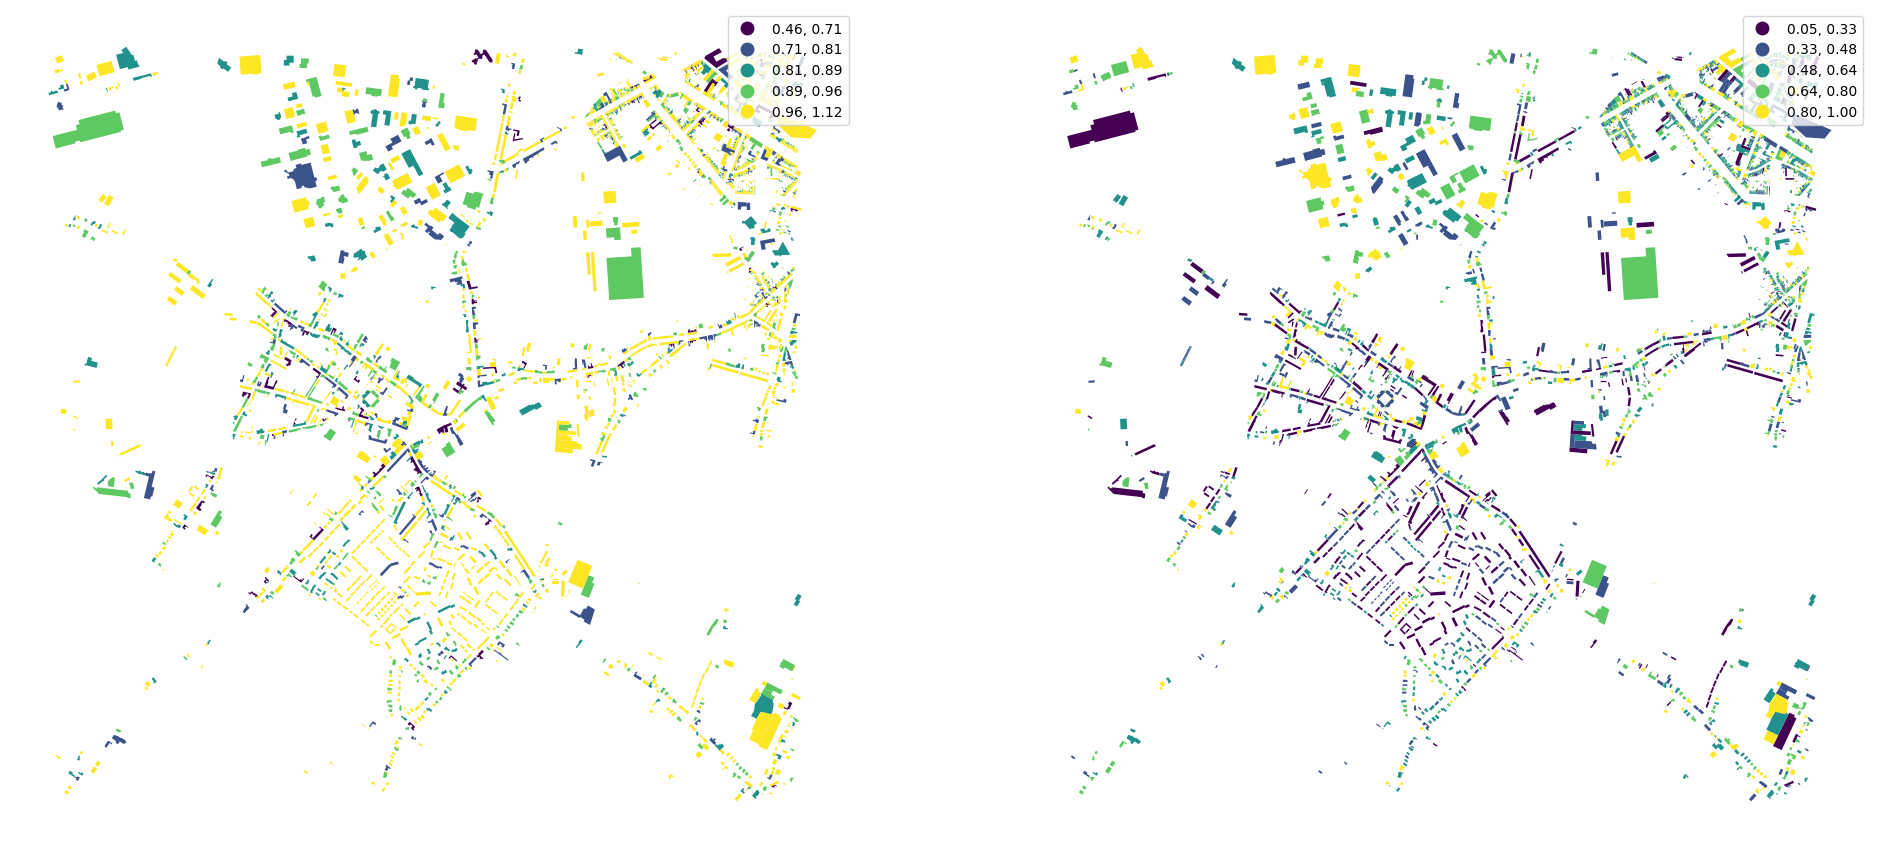

In [ ]:
# Expected outcome below...

<div class="alert alert-block alert-warning">
<b>Question 4.2.3: </b><br>Plot side by side the convexity and the linearity.  
    Switch the following cell from raw mode to code mode and fill-in the blanks.
</div>

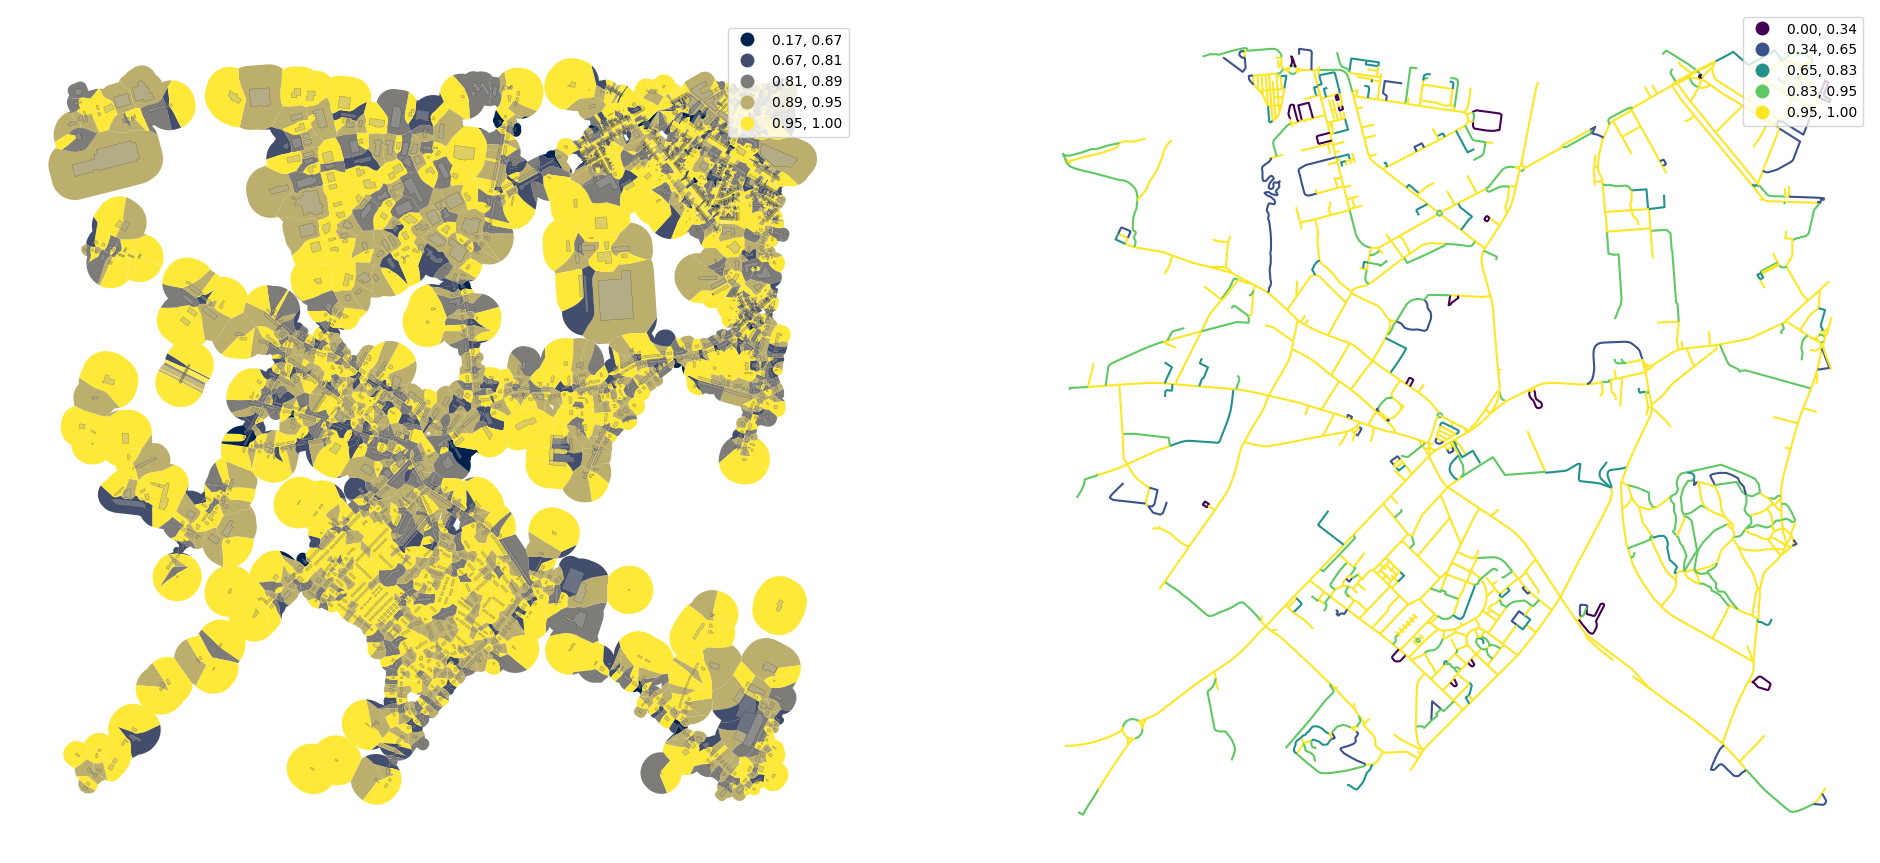

In [ ]:
# Expected outcome below...

<div class="alert alert-block alert-success">
	<b>4.3 Measure characters related to spatial distribution</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.3.1: </b><br>Compute the shared_walls value for each building and store it in the 'shared_walls' column of the building geodataframe.
    What is the shared_walls value? What do you see on the map?
</div>

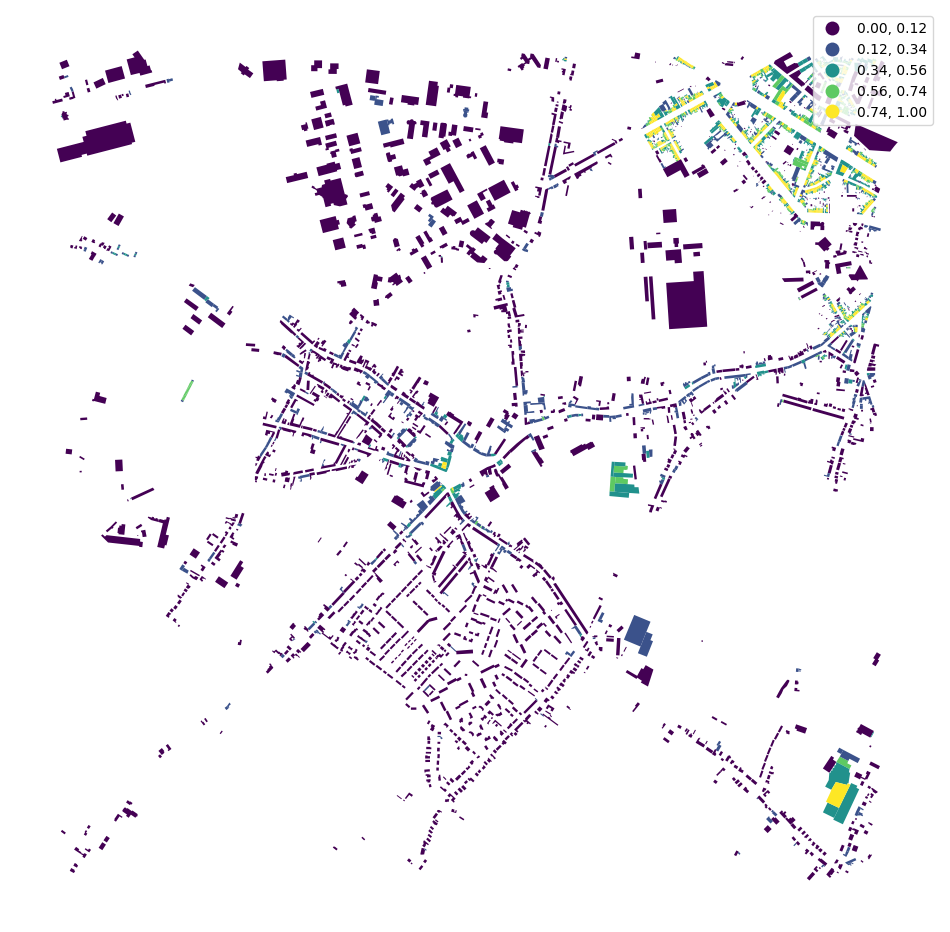

In [28]:
buildings["shared_walls"] = mm.shared_walls(buildings) / buildings.length
buildings.plot(
    "shared_walls", figsize=(12, 12), scheme='natural_breaks', legend=True
).set_axis_off()

<div class="alert alert-block alert-success">
	<b>4.4 Generate spatial graph using `libpysal`</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.4.1: </b><br>Observe the code cell below. Use the documentation to understand want is done at this step.  
    What is rook contiguity and what is queen contiguity?  
    What is stored in tesselation['neighbors']? and in buildings['neighbor_distance']?
    What does the method `describe` on queen_1?
</div>

In [29]:
queen_1 = libpysal.graph.Graph.build_contiguity(tessellation, rook=False)
tessellation['neighbors'] = mm.neighbors(tessellation, queen_1, weighted=True)
tessellation['covered_area'] = queen_1.describe(tessellation.area)['sum']
buildings['neighbor_distance'] = mm.neighbor_distance(buildings, queen_1)

/tmp/ipykernel_764247/842040123.py:3: UserWarning: The numba package is used extensively in this module to accelerate the computation of graphs. Without numba, these computations may become unduly slow on large data.
  tessellation['covered_area'] = queen_1.describe(tessellation.area)['sum']


<div class="alert alert-block alert-warning">
<b>Question 4.4.2: </b><br>Plot side by side the neighbor distance and the covered area.  
    Switch the following cell from raw mode to code mode and fill-in the blanks.
</div>

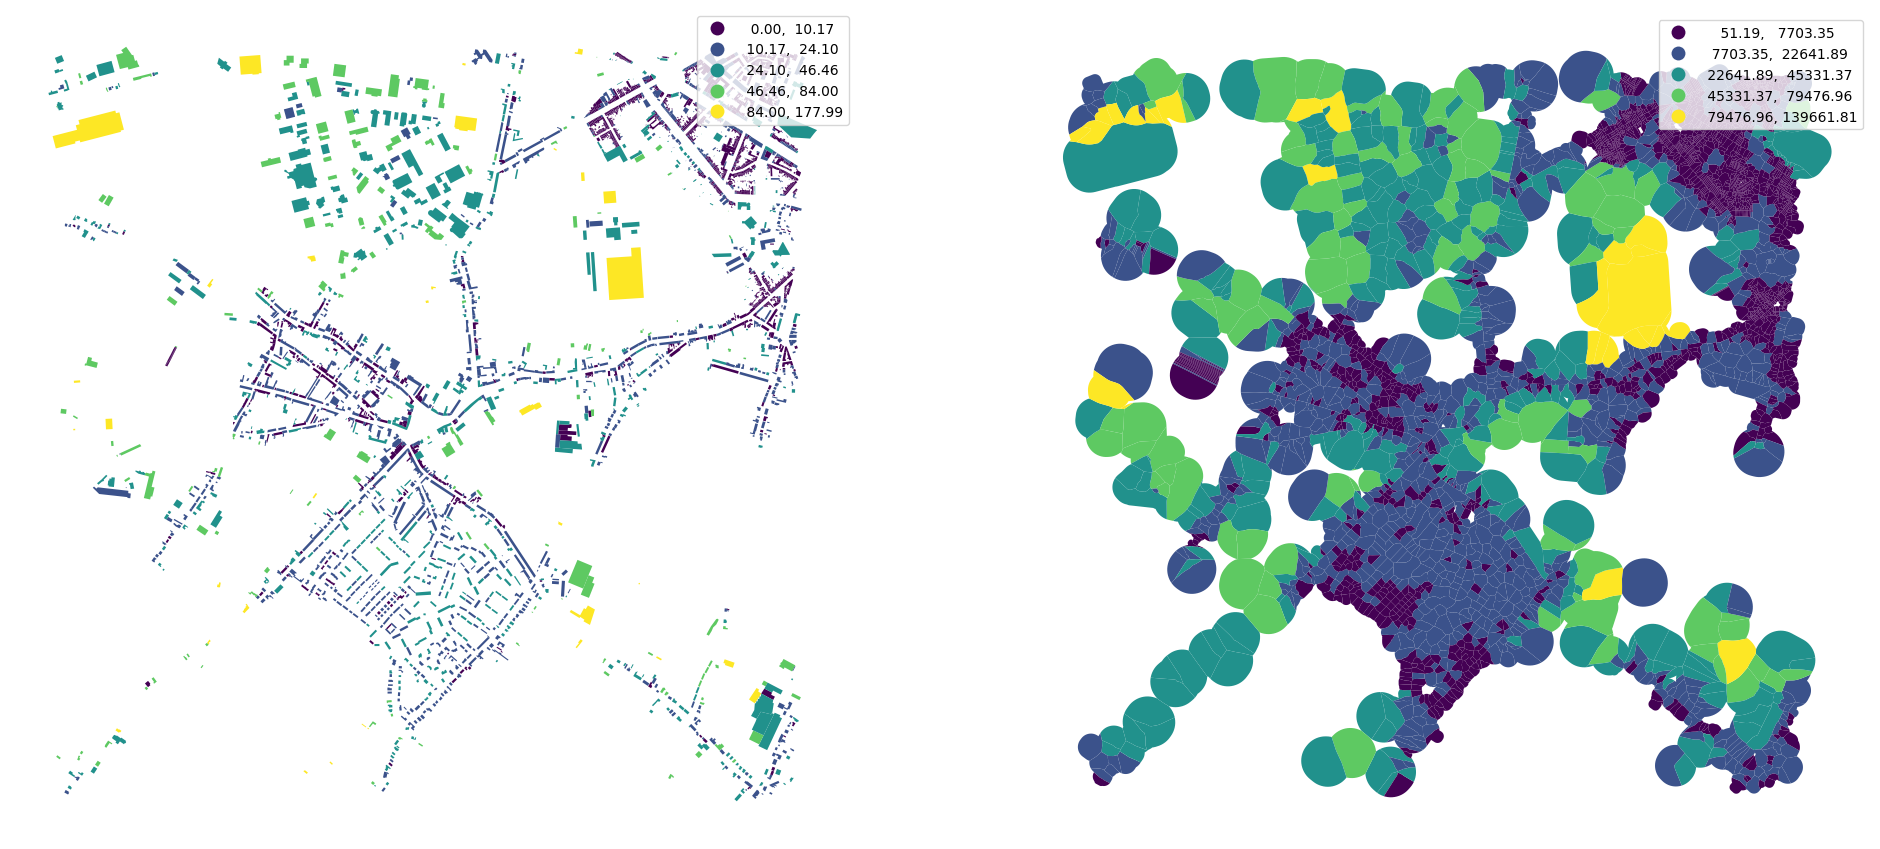

In [ ]:
# Expected outcome below...

<div class="alert alert-block alert-success">
	<b>4.5 Compute interbuilding distance</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.5.1: </b><br>Observe the code cell below. Use the documentation to understand want is done at this step.  
    What does the method `higher_order` on queen_1?
    What is the difference between queen_1 and buildings_q1?  
    What is buildings['adjacency']?
    
</div>

In [31]:
queen_3 = queen_1.higher_order(3)
buildings_q1 = libpysal.graph.Graph.build_contiguity(buildings, rook=False)

buildings["interbuilding_distance"] = mm.mean_interbuilding_distance(
    buildings, queen_1, queen_3
)
buildings["adjacency"] = mm.building_adjacency(buildings_q1, queen_3)

/home/su530201/.local/share/virtualenvs/GIS_Urban_Planning-bS-tQSLp/lib/python3.10/site-packages/momepy/functional/_distribution.py:382: RuntimeWarning: invalid value encountered in scalar divide
  mean_distances[i] = sub_matrix.sum() / sub_matrix.nnz


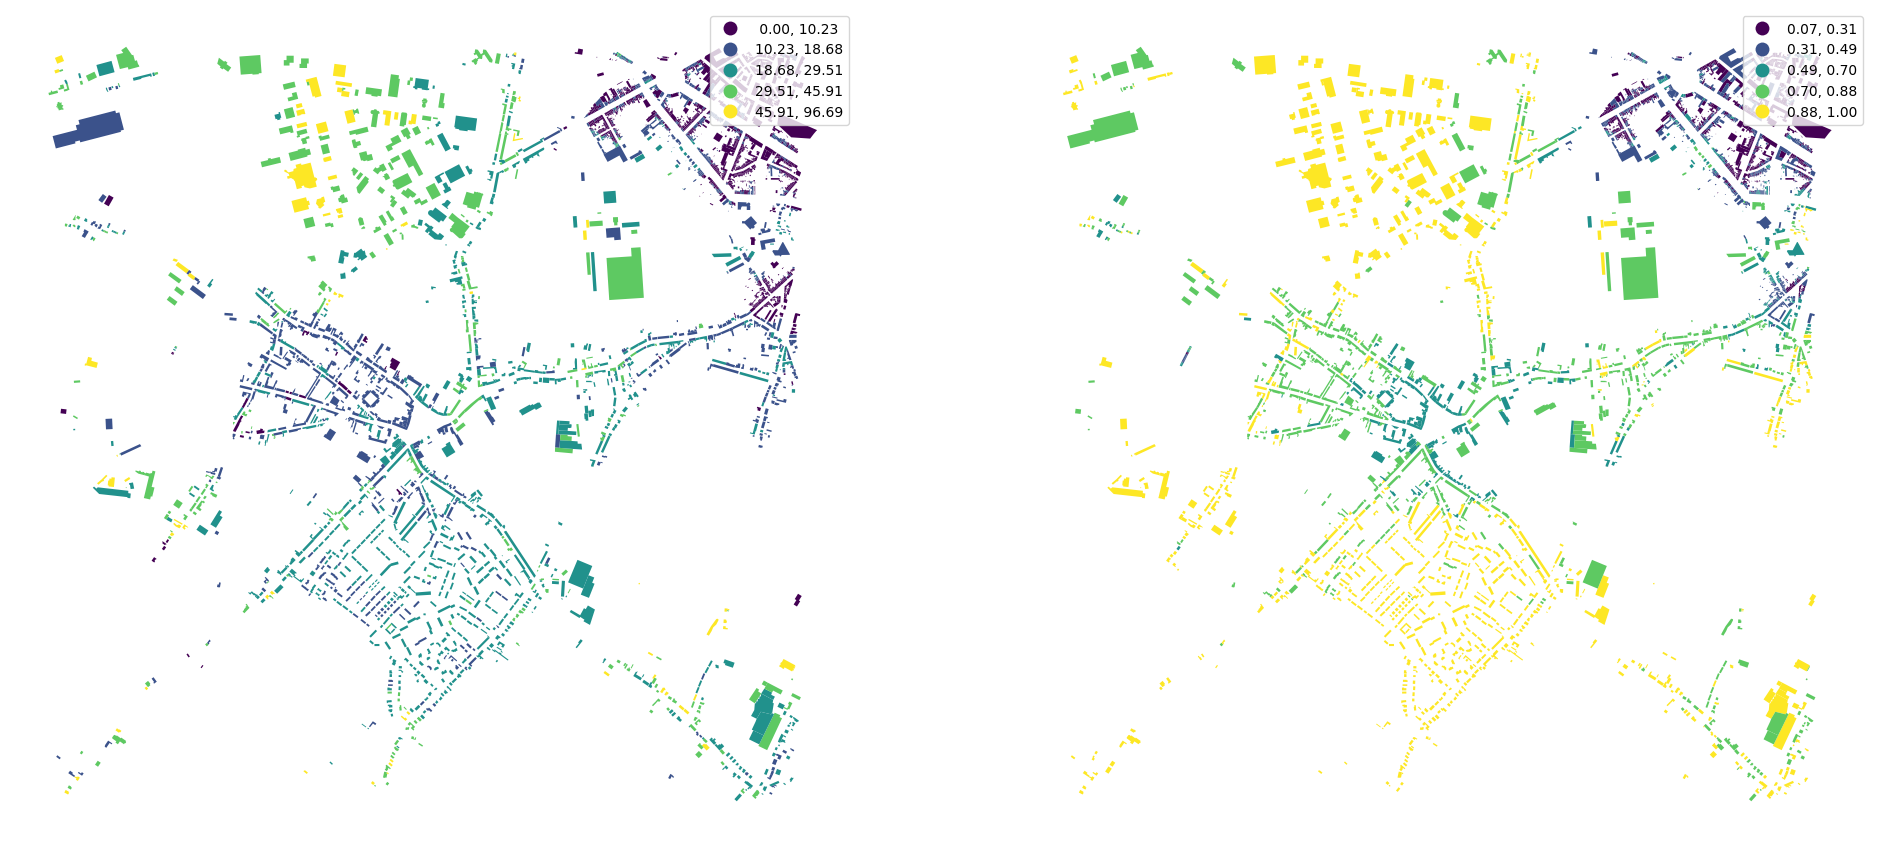

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot(
    "interbuilding_distance", ax=ax[0], scheme='natural_breaks', legend=True
)
buildings.plot("adjacency", ax=ax[1], scheme='natural_breaks', legend=True)

ax[0].set_axis_off()
ax[1].set_axis_off()

<div class="alert alert-block alert-success">
	<b>4.6 Analyse the walkable network</b>
</div>

### @question 
    What does the function street_profile? Look at what it returns...

In [33]:
profile = mm.street_profile(streets, buildings)
streets[profile.columns] = profile

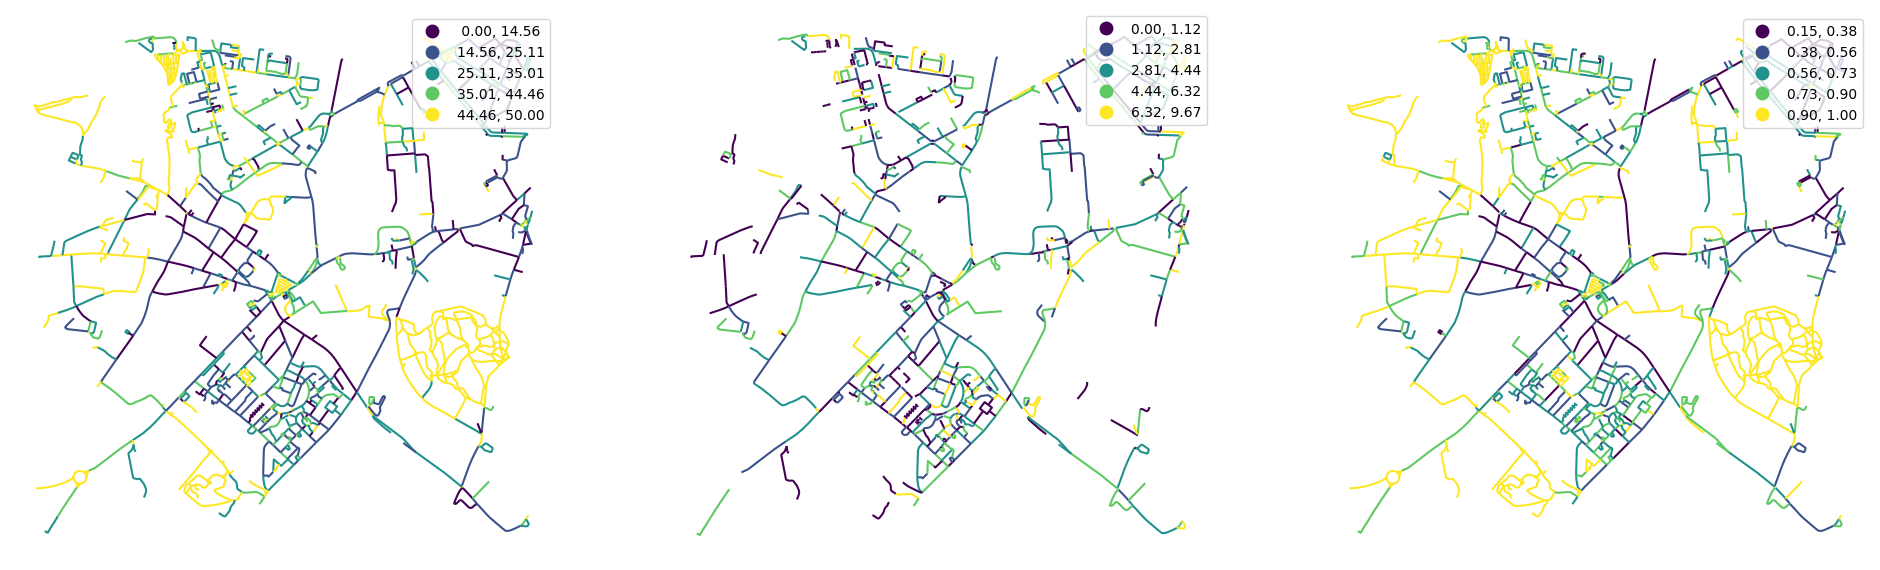

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

streets.plot("width", ax=ax[0], scheme='natural_breaks', legend=True)
streets.plot("width_deviation", ax=ax[1], scheme='natural_breaks', legend=True)
streets.plot("openness", ax=ax[2], scheme='natural_breaks', legend=True)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

<div class="alert alert-block alert-success">
	<b>4.7 Measure characters related to intensity</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.7.1: </b><br>What is car?
</div>

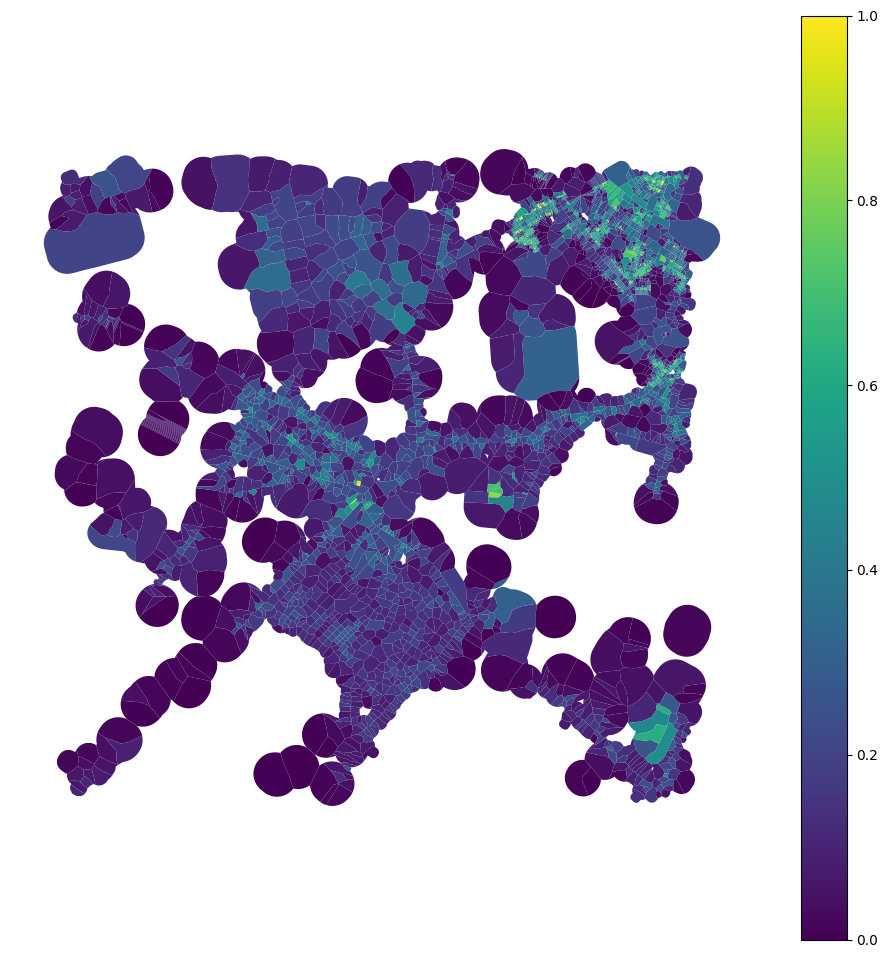

In [35]:
tessellation['car'] = buildings.area / tessellation.area
tessellation.plot("car", figsize=(12, 12), vmin=0, vmax=1, legend=True).set_axis_off()

<div class="alert alert-block alert-success">
	<b>4.8 Measure characters related to connectivity</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.8.1: </b><br>Examine the cell code hereunder and search for the definitions of each character measured.
    What are nodes and edges? 
</div>

In [36]:
graph = mm.gdf_to_nx(streets)
graph = mm.node_degree(graph)
graph = mm.closeness_centrality(graph, radius=400, distance='mm_len')
graph = mm.meshedness(graph, radius=400, distance='mm_len')
nodes, edges = mm.nx_to_gdf(graph)

  0%|          | 0/1083 [00:00<?, ?it/s]

  0%|          | 0/1083 [00:00<?, ?it/s]

/home/su530201/.local/share/virtualenvs/GIS_Urban_Planning-bS-tQSLp/lib/python3.10/site-packages/mapclassify/classifiers.py:687: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self._classify()


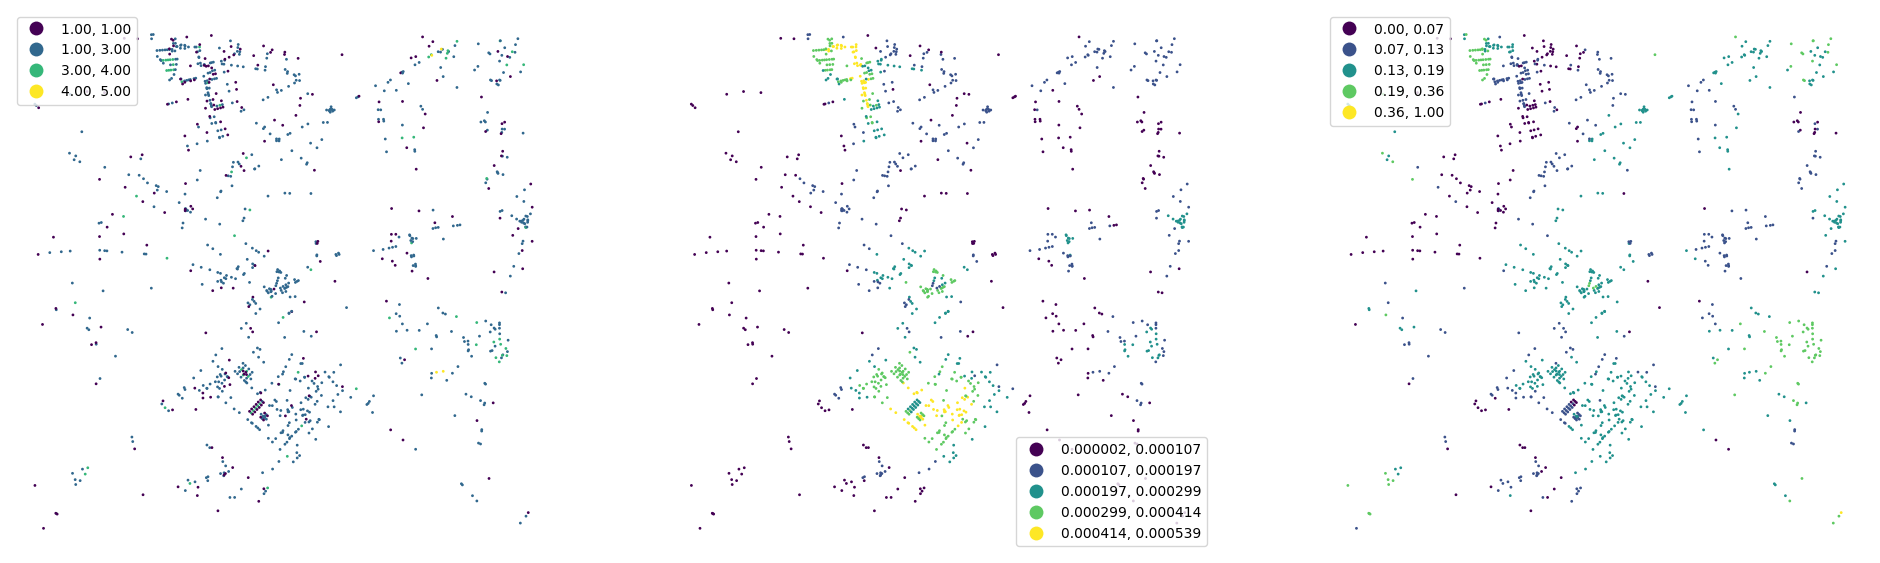

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

nodes.plot('degree', ax=ax[0], scheme='natural_breaks', legend=True, markersize=1)
nodes.plot('closeness', ax=ax[1], scheme='natural_breaks', legend=True, markersize=1, legend_kwds={'fmt': '{:.6f}'})
nodes.plot('meshedness', ax=ax[2], scheme='natural_breaks', legend=True, markersize=1)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

***
## 5. Link buildings, walkable network and tessellation	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

<div class="alert alert-block alert-success">
	<b>5.1 merge tesselation, buildings, nodes and edges</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 5.1.1: </b><br>Explain what is done with the get_nearest functions used.
</div>

In [38]:
buildings['edge_index'] = mm.get_nearest_street(buildings, edges)
buildings['node_index'] = mm.get_nearest_node(buildings, nodes, edges, buildings['edge_index'])

Link all data together (to tessellation cells or buildings).

<div class="alert alert-block alert-warning">
<b>Question 5.1.2: </b><br>The code below links all data buildings (or tessellation cells).
    Explore the merge method to understand precisely what is done at this step.
</div>

In [39]:
tessellation[buildings.columns.drop(['geometry', 'street_index'])] = (buildings.drop(columns=['geometry', 'street_index']))
merged = tessellation.merge(edges.drop(columns='geometry'), left_on='edge_index', right_index=True, how='left')
merged = merged.merge(nodes.drop(columns='geometry'), left_on='node_index', right_index=True, how='left')

In [40]:
merged.columns

Index(['geometry', 'street_index', 'tess_area', 'convexity', 'neighbors',
       'covered_area', 'car', 'building_area', 'eri', 'elongation',
       'shared_walls', 'neighbor_distance', 'interbuilding_distance',
       'adjacency', 'edge_index', 'node_index', 'length', 'linearity', 'width',
       'openness', 'width_deviation', 'mm_len', 'node_start', 'node_end', 'x',
       'y', 'degree', 'closeness', 'meshedness', 'nodeID'],
      dtype='object')

<div class="alert alert-block alert-success">
	<b>5.2 Measure first, second and third quartile of distribution of values within an area around each building</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 5.2.1: </b><br>Look at the code below and try to understand it.
    What does the `mm.percentile` function? Why are we passing queen_3 as an argument to that function?
</div>

In [41]:
percentiles = []
for column in merged.columns.drop(['street_index', 'node_index', 'edge_index', 'nodeID', 'mm_len', 'node_start', 'node_end', 'geometry']):
    perc = mm.percentile(merged[column], queen_3)
    perc.columns = [f'{column}_' + str(x) for x in perc.columns]
    percentiles.append(perc)

/home/su530201/.local/share/virtualenvs/GIS_Urban_Planning-bS-tQSLp/lib/python3.10/site-packages/momepy/functional/_diversity.py:56: RuntimeWarning: invalid value encountered in divide
  xs = xs / weights.sum()
/home/su530201/.local/share/virtualenvs/GIS_Urban_Planning-bS-tQSLp/lib/python3.10/site-packages/momepy/functional/_diversity.py:56: RuntimeWarning: invalid value encountered in divide
  xs = xs / weights.sum()


In [42]:
percentiles_joined = pd.concat(percentiles, axis=1)
percentiles_joined.head()

tess_area_25  tess_area_50  tess_area_75  convexity_25  \
focal                                                               
37382865      62.421500    161.463528    320.196458      0.886946   
82963797    2856.317156   4588.827120   9187.498953      0.869873   
104306757   2895.173506   7348.439947   9191.223461      0.918207   
107321134   1286.859372   2675.117144   4437.286344      0.896399   
107395503    470.411204   1356.032622   3003.744087      0.870515   

           convexity_50  convexity_75  neighbors_25  neighbors_50  \
focal                                                               
37382865       0.955323      0.985296      0.060511      0.095225   
82963797       0.919542      0.953751      0.015308      0.019624   
104306757      0.929221      0.962321      0.015302      0.019834   
107321134      0.954343      0.983370      0.013023      0.022023   
107395503      0.913130      0.951700      0.029727      0.036575   

           neighbors_75  covered_area_25  ...           y_75  degree_25  \
focal                                     ...                             
37382865       0.132911       965.618673  ...  626520.341384        3.0   
82963797       0.021752     31407.857092  ...  626553.907623        1.0   
104306757      0.022173     31188.103452  ...  626508.210073        1.0   
107321134      0.032344     13128.201615  ...  626574.905863        1.0   
107395503      0.050286      6875.925483  ...  625251.850846        3.0   

           degree_50  degree_75  closeness_25  closeness_50  closeness_75  \
focal                                                                       
37382865         3.0        3.0      0.000112      0.000120      0.000163   
82963797         1.0        3.0      0.000144      0.000253      0.000455   
104306757        3.0        3.0      0.000174      0.000241      0.000365   
107321134        1.0        3.0      0.000027      0.000027      0.000168   
107395503        3.0        3.0      0.000158      0.000231      0.000319   

           meshedness_25  meshedness_50  meshedness_75  
focal                                                   
37382865        0.164706       0.188679       0.196078  
82963797        0.056604       0.072902       0.083704  
104306757       0.062886       0.079602       0.082376  
107321134       0.080000       0.235294       0.235294  
107395503       0.124962       0.148387       0.172488  

[5 rows x 66 columns]

### Question
    Compare the original convexity with the spatially lagged one.  
    What do you observe?

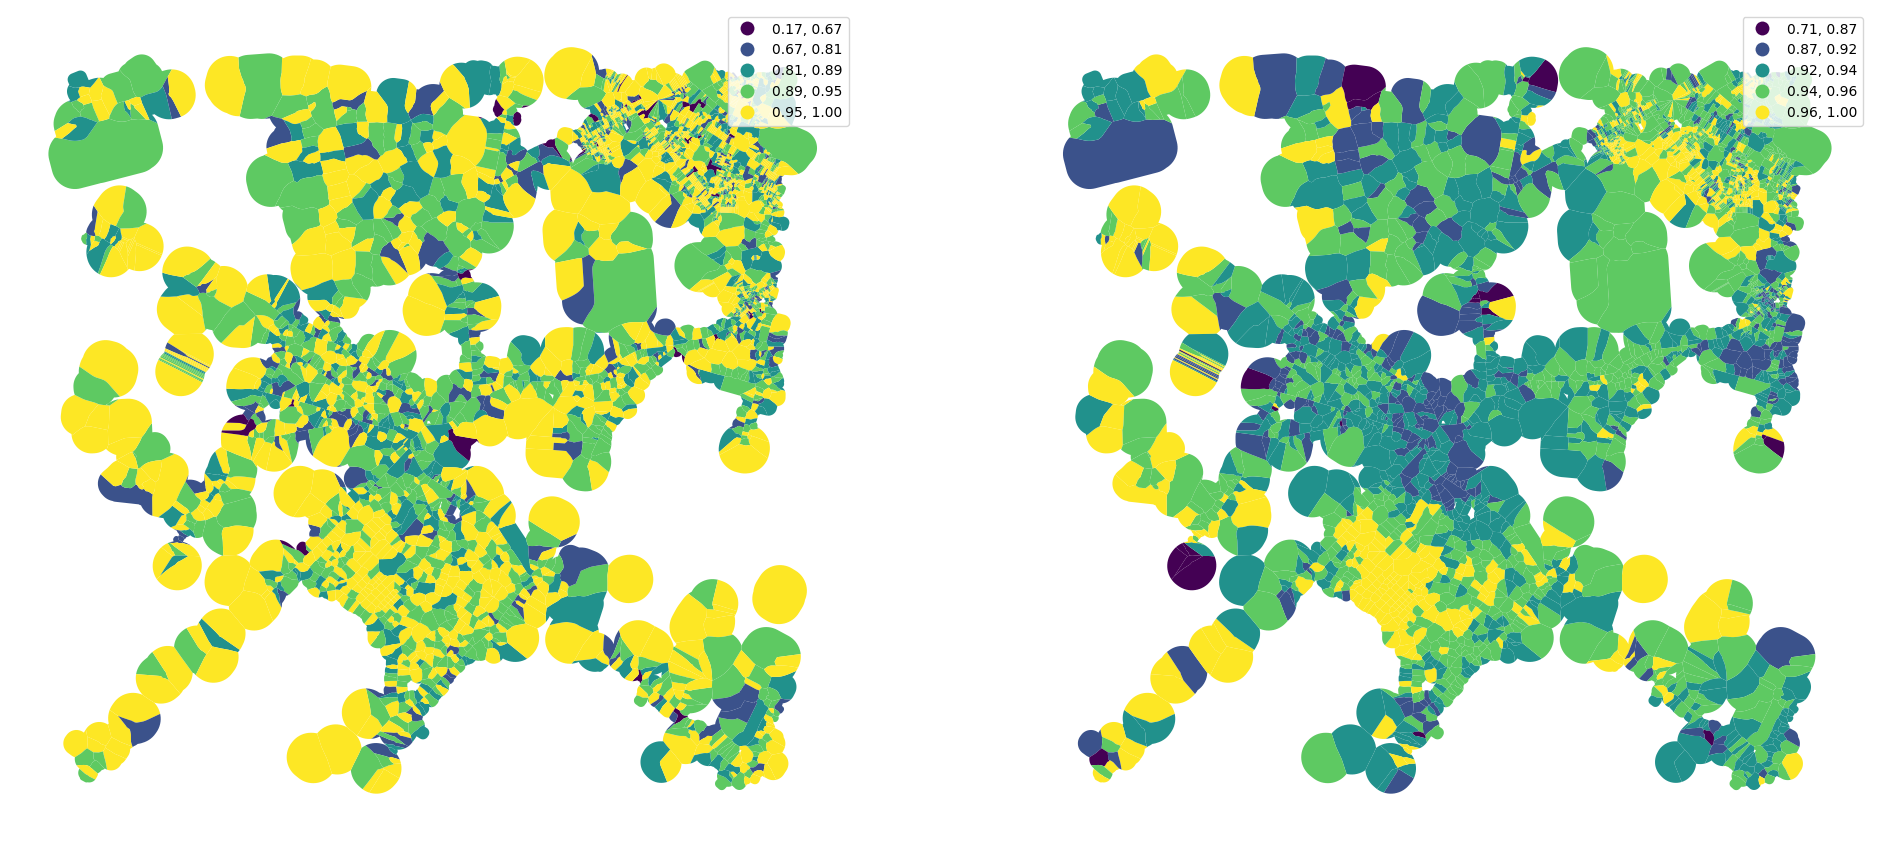

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot('convexity', ax=ax[0], scheme='natural_breaks', legend=True)
merged.plot(percentiles_joined['convexity_50'].values, ax=ax[1], scheme='natural_breaks', legend=True)

ax[0].set_axis_off()
ax[1].set_axis_off()

***
## 6. Use clustering to assign a type of urban structure	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

<div class="alert alert-block alert-success">
	<b>6.1 Standardize the data</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 6.1.1: </b><br>Before doing the clustering, we should standardize the data by removing the mean the dividing by the standard deviation.  
    Store the standardized data in a dataframe named `standardized`
</div>

In [ ]:
# Expected outcome below...

tess_area_25  tess_area_50  tess_area_75  convexity_25  \
focal                                                               
37382865      -0.591795     -0.578958     -0.580863     -0.219990   
82963797       2.542413      2.276782      2.228918     -0.705674   
104306757      2.586002      4.056789      2.230099      0.669284   
107321134      0.781786      1.042400      0.723719      0.048933   
107395503     -0.134110      0.191563      0.269472     -0.687394   

           convexity_50  convexity_75  neighbors_25  neighbors_50  \
focal                                                               
37382865       0.449652      0.719556      0.334040      0.607496   
82963797      -1.206571     -1.305567     -1.135096     -1.210040   
104306757     -0.758554     -0.755387     -1.135306     -1.204976   
107321134      0.404295      0.595946     -1.209365     -1.152349   
107395503     -1.503387     -1.437257     -0.666482     -0.802510   

           neighbors_75  covered_area_25  ...      y_75  degree_25  degree_50  \
focal                                     ...                                   
37382865       0.695761        -0.626255  ...  0.928769   0.451821   0.159359   
82963797      -1.281240         3.691787  ...  0.971744  -2.323332  -4.378392   
104306757     -1.273758         3.660616  ...  0.913237  -2.323332   0.159359   
107321134     -1.092850         1.098932  ...  0.998628  -2.323332  -4.378392   
107395503     -0.773759         0.212085  ... -0.695289   0.451821   0.159359   

           degree_75  closeness_25  closeness_50  closeness_75  meshedness_25  \
focal                                                                           
37382865   -0.192168     -0.188910     -0.338721     -0.094768       0.885194   
82963797   -0.192168      0.282425      1.332444      2.923927      -1.215896   
104306757  -0.192168      0.732055      1.191066      1.998517      -1.093790   
107321134  -0.192168     -1.457285     -1.519855     -0.047001      -0.761164   
107395503  -0.192168      0.493022      1.055404      1.519946       0.112720   

           meshedness_50  meshedness_75  
focal                                    
37382865        1.014638       0.377424  
82963797       -1.161780      -0.728855  
104306757      -1.035826      -0.741936  
107321134       1.890918       0.763486  
107395503       0.257215       0.145185  

[5 rows x 66 columns]

<div class="alert alert-block alert-success">
	<b>6.2 Apply K-Means clustering</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 6.2.1: </b><br>To compute the cluster, we will use the class Clustergram. By default it uses the k-means clustering algorithm. Clustergram also helps us choose how many clusters we should keep.  See clustergram [documentation](https://clustergram.readthedocs.io) for details.
</div>

In [45]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e636772616d203d20436c75737465726772616d2872616e676528312c203132292c206e5f696e69743d3130302c2072616e646f6d5f73746174653d3432293c62723e0a636772616d2e666974287374616e64617264697a65642e66696c6c6e61283029293c62723e0a636772616d2e706c6f7428293c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions


<b>Note:</b><br>:<br>
    Clustegram outputs the final labels assigned to buildings.


In [46]:
cgram.labels.head()

1   2   3   4   5   6   7   8   9   10  11
0   0   1   0   0   3   1   4   6   6   1   3
1   0   0   1   1   4   5   1   7   2   6   6
2   0   0   1   1   4   5   1   7   2   6   6
3   0   0   1   1   2   2   5   3   3   0   8
4   0   0   2   2   0   3   3   1   0   3   4

<div class="alert alert-block alert-warning">
<b>Question 6.2.2: </b><br>Pick the right number of clusters and assign the corresponding cluster label to each building
</div>

<div class="alert alert-block alert-warning">
<b>Question 6.2.3: </b><br>Plot the buildings using the cluster label to paint them.
</div>

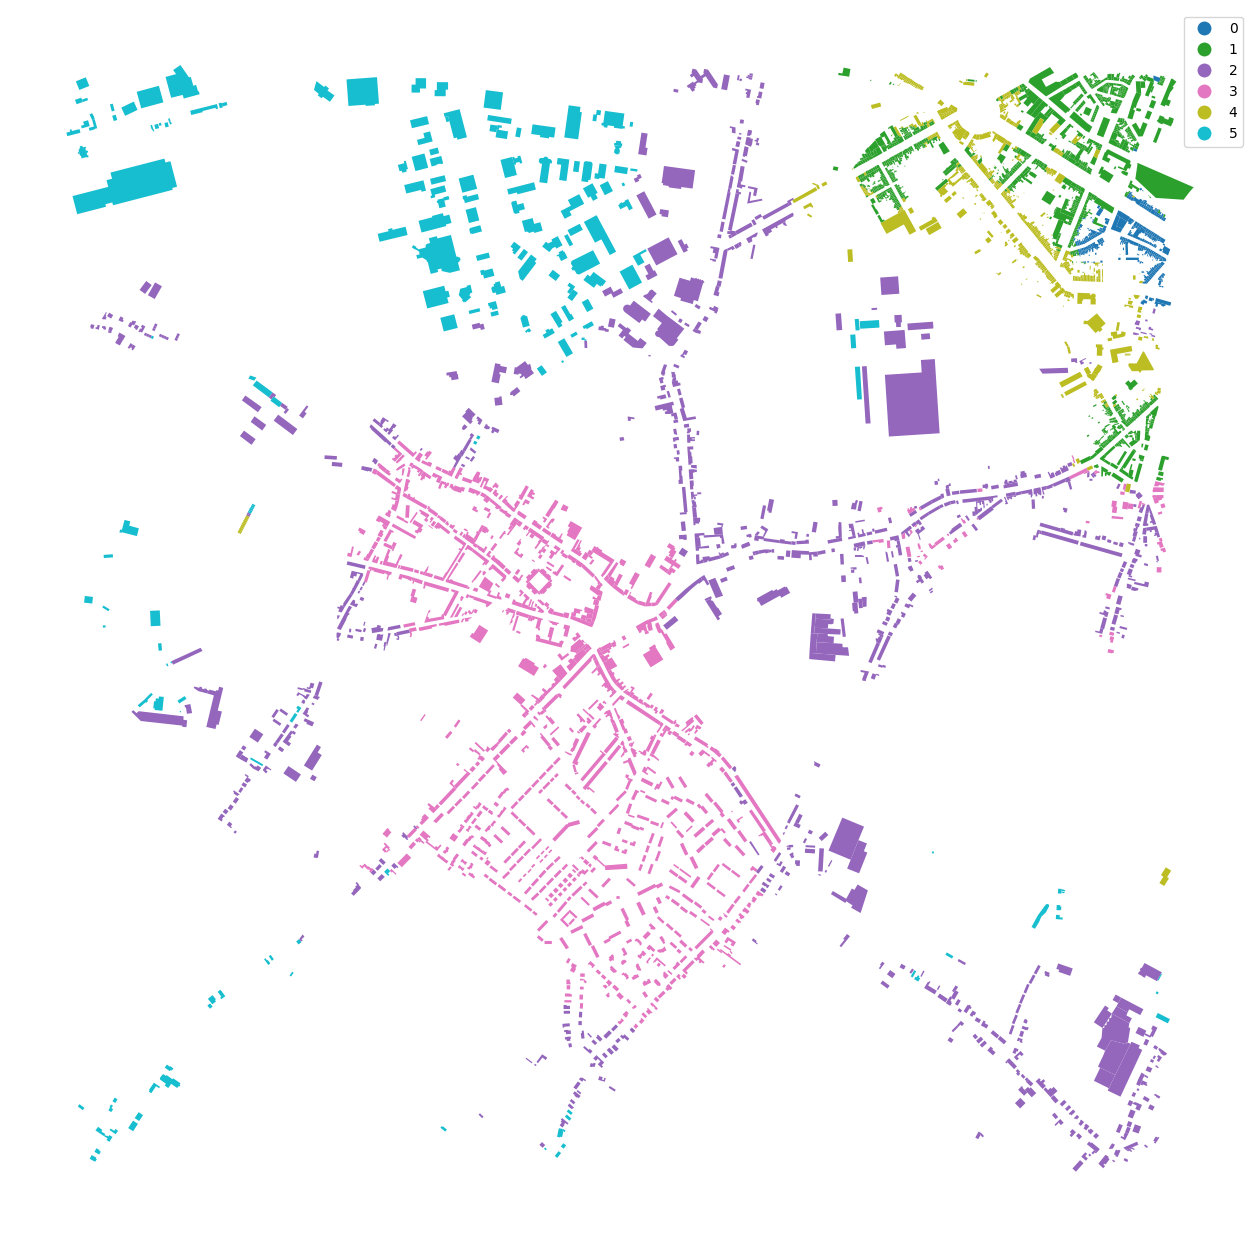

In [ ]:
# Expected outcome below...

<div class="alert alert-block alert-warning">
<b>Question 6.2.4: </b><br>Plot your clustering with openstreetmap as basemap and analyse the result of the clustering.  
    What are your observations?
</div>

In [49]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e6275696c64696e67732e6578706c6f726528636f6c756d6e3d27636c7573746572272c636d61703d276a657427293c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions
